# CS 5635 - Assignment 1
Jake Betenson | u0624782

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
np.random.seed(666)

In [182]:
congress_path = 'data/congress-terms.csv'
noaa_path = 'data/NOAA-Temperatures.csv'
birth_path = 'data/us birth data set.csv'
tarantino_path = 'data/tarantino.csv'
drug_path = 'data/drug-use-by-age.csv'
hate_path = 'data/hate_crimes.csv'

# Part 1: Generate your own data and Visualize

Text(0.5, 0, 'Category')

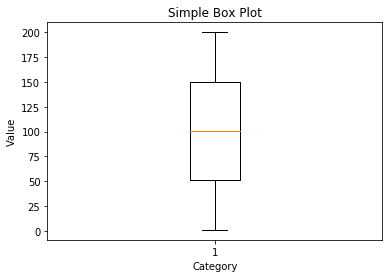

In [4]:
# 1. Create an array with 200 elements from 1 to 200 in order.  Create a box plot for visualization of your data.
box_dat = np.arange(1,201)
plt.boxplot(box_dat)
plt.title('Simple Box Plot')
plt.ylabel('Value')
plt.xlabel('Category')


Text(0, 0.5, 'Frequency')

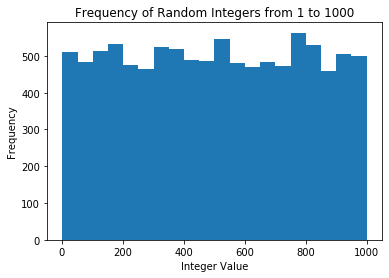

In [5]:
# 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.
hist_dat = np.random.randint(1,1001,10000)
plt.hist(hist_dat,bins=20)
plt.title('Frequency of Random Integers from 1 to 1000')
plt.xlabel('Integer Value')
plt.ylabel('Frequency')

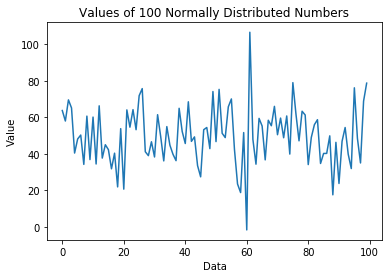

In [175]:
# 3. Write a program to generate 100 random numbers Gaussian distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.
#use empirical rule to find 50 + 3s = 100 -> s = 50/3
line_dat = np.random.normal(loc=50,scale=50/3,size=100)
plt.plot(line_dat)
plt.title('Values of 100 Normally Distributed Numbers')
plt.xlabel('Data')
plt.ylabel('Value')

#write to binary
np.save(file='data/binary_test.npy', arr=line_dat)

Text(0, 0.5, 'Frequency')

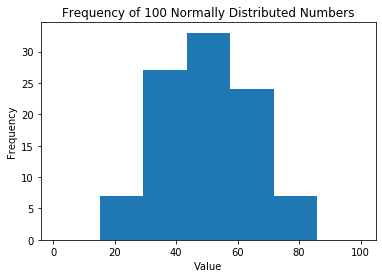

In [176]:
# 4. Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: Display a histogram of your result.
read_dat = np.load('data/binary_test.npy')
plt.hist(read_dat, bins=7, range=(1,100))
plt.title('Frequency of 100 Normally Distributed Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')

### Part 1 Summary
I'm already somewhat familiar with Numpy and MatPlotLib, so this was a good refresher on how to use both of those libraries.

# Part 2: Interesting Data Sets for Visualization



## 2.1 NOAA Land Ocean Temperature Anomalies

Text(0.5, 0, 'Year')

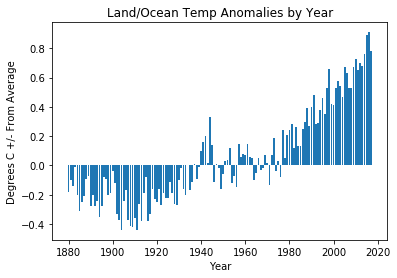

In [185]:
# 1. Download the NOAA Land Ocean Temperature Anomalies Data Set: https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. Create a bar plot of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data
noaa_dat = np.genfromtxt(fname=noaa_path,skip_header=5,delimiter=',')
plt.bar(x=noaa_dat[:,0],height=noaa_dat[:,1])
plt.title('Land/Ocean Temp Anomalies by Year')
plt.ylabel('Degrees C +/- From Average')
plt.xlabel('Year')

The anomalies appear to be linearly increasing every year since about 1910.  This seems to coincide with increased global industrialization, particularly with the industrialization of densely populated East Asia.


## 2.2 US Congress by Age

Text(0.5, 1.05, 'Average Age of Congressional Members\n80th Congress - 113th Congress\n')

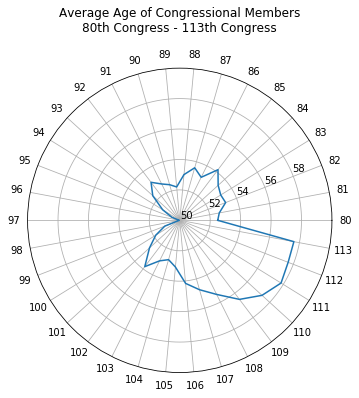

In [179]:
# 2. Download the member of Congress by Age data set: https://git.io/Jt45w2 Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

#congress_dat = np.genfromtxt(fname='congress-terms.csv',skip_header=1,delimiter=',')
congress_dat = np.genfromtxt(fname=congress_path,skip_header=1,delimiter=',')

#Polar Plot/Star Plot
#find average age of each congress
congresses = np.unique(congress_dat[:,0])
#print(f"The number of unique Congresses is {len(congresses)}")
categories = []
for c in range(len(congresses)):
    categories.append(str(int(congresses[c])))
avg_ages = []
age_dat = np.select((congress_dat[:,0]==congresses[0]),congress_dat)
for x in congresses:
    total_age = 0
    count = 0
    for row in range(congress_dat.shape[0]):
        if (congress_dat[row,0]==x):
            count = count + 1
            total_age = total_age + congress_dat[row,-1]
    avg_ages.append(total_age/count)   
    
N = len(avg_ages)
avg_ages += avg_ages[:1] #close the circle
angles = [n/float(N) * 2 * pi for n in range(N)]
angles += angles[:1] #close the circles

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(121, polar='True')
plt.polar(angles, avg_ages)
plt.xticks(angles[:-1], categories)
plt.yticks([50, 52, 54, 56, 58])
plt.ylim(50,60)
plt.title('Average Age of Congressional Members\n80th Congress - 113th Congress\n')



In [180]:
# TODO
# Parallel Coordinates Plot
# Probably need to do some encoding techniques for this to work out.
df = pd.read_csv(congress_path,delimiter=',',header='infer')
#print(df)
#print(df.party.unique())
#pd.plotting.parallel_coordinates(df, 'congress', cols=['age','chamber','party','incumbent','age'])

### Congress Age Trends
Each congress' average has steadily increased to about 

## 2.3 US Birth Data Set

([<matplotlib.axis.XTick at 0x253674a4648>,
 <a list of 7 Text xticklabel objects>)

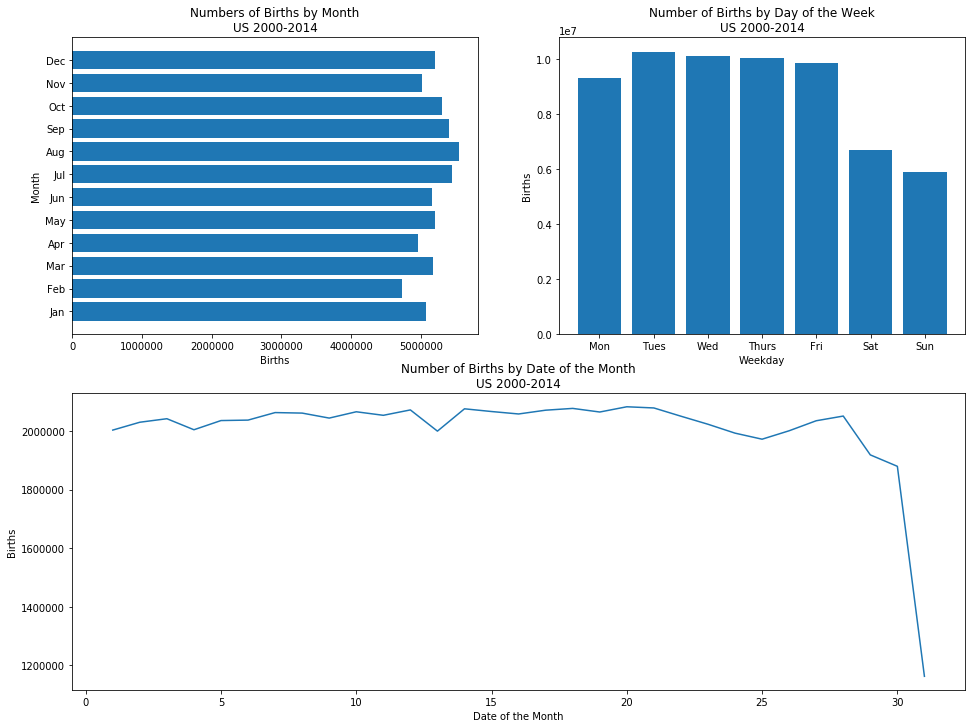

In [183]:
# 3. Download the U.S. Birth data set: https://git.io/Jt45X. What day of the month had the highest number of births? What day of the month had the lowest number of births? Are there any interesting trends in the data, i.e. more births in Summer or Winter? What about births on Friday the 13th?
birth_dat = pd.read_csv(birth_path)
fig = plt.figure(figsize=(16,12))

#month data
ax=plt.subplot(221)
month_dat = birth_dat[['month','births']].groupby(['month']).sum()
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
x=np.arange(1,13)
plt.barh(x, month_dat.to_numpy().T[0,:])
plt.title('Numbers of Births by Month\nUS 2000-2014')
plt.xlabel('Births')
plt.ylabel('Month')
plt.yticks(x, Months)

#date data
ax=plt.subplot(212)
date_dat = birth_dat[['date_of_month','births']].groupby(['date_of_month']).sum()
plt.plot(np.arange(1,32),date_dat.to_numpy())
plt.title('Number of Births by Date of the Month\nUS 2000-2014')
plt.xlabel('Date of the Month')
plt.ylabel('Births')

#weekday data
ax=plt.subplot(222)
day_dat = birth_dat[['day_of_week','births']].groupby(['day_of_week']).sum()
x=np.arange(1,8)
plt.bar(x,day_dat.to_numpy().T[0,:])
plt.title('Number of Births by Day of the Week\nUS 2000-2014')
plt.xlabel('Weekday')
plt.ylabel('Births')
weekdays = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(x,weekdays)

In [157]:
#Stats of Note
print(f"the month with the most births is: {month_dat['births'].argmax()} with a total of {month_dat['births'].max()} births\n")
f13 = birth_dat[['day_of_week','date_of_month','births']]
f13.loc[(f13['day_of_week'].isin([1,2,3,4,5,6,7])) & (f13['date_of_month'] == 13)].groupby(['day_of_week','date_of_month']).sum()
#print(f13.loc[(f13['day_of_week'] == '5']) & (f13['date_of_month'] == '13'))]

the month with the most births is: 8 with a total of 5540170 births



,,births
day_of_week,date_of_month,
1,13,283333
2,13,334490
3,13,318401
4,13,351784
5,13,298749
6,13,213769
7,13,199538


Analyzing birth

While there is a dip in the births on the 13th day of the month, there doesn't appear to be a sharp decrease of births on Friday the 13th.

## 2.4 FiveThirtyEight Interesting Datasets

In [184]:
# 4. Five Thirty Eight maintains a sever with many interesting datasets: https://github.com/fivethirtyeight/data . Choose 3 different data sets to visualize. Visualize each data set in a different way. Describe the trends in the data.
tino_dat = pd.read_csv(tarantino_path)
print(tino_dat)

               movie   type          word  minutes_in
0     Reservoir Dogs   word          dick        0.40
1     Reservoir Dogs   word         dicks        0.43
2     Reservoir Dogs   word        fucked        0.55
3     Reservoir Dogs   word       fucking        0.61
4     Reservoir Dogs   word      bullshit        0.61
...              ...    ...           ...         ...
1889    Jackie Brown   word  motherfucker      141.93
1890    Jackie Brown   word           ass      142.43
1891    Jackie Brown   word       fucking      142.47
1892    Jackie Brown   word       goddamn      142.97
1893    Jackie Brown  death           NaN      143.13

[1894 rows x 4 columns]


In [186]:
drug_dat = pd.read_csv(drug_path)

In [187]:
hate_path = pd.read_csv(hate_path)